### En este notebook vamos a probar diferentes clasificadores con los datos que hemos creado anteriormente. Se tendrá en cuanta para decidir el mejor tanto la precision como el tiempo de convergencia de la funcion de coste etc.

In [1]:
import numpy as np
import pandas as pd
from sklearn import metrics

Leemos los datos de train/test y creamos Xtrain/test y ytrain/test

In [2]:
dataTrain = np.load('train_img_features_non_processed.npy')
Xtrain = dataTrain[:,:-1]
ytrain = dataTrain[:,-1]

dataTest = np.load('test_img_features_non_processed.npy')
Xtest = dataTest[:,:-1]
ytest = dataTest[:,-1]

### Regresion logistica

Probamos el clasificador de regresión logistica con los datos de test

In [ ]:
from sklearn.linear_model import LogisticRegression
clfLogRegr = LogisticRegression(random_state=0,max_iter=400).fit(Xtrain, ytrain)

clfLogRegr.score(Xtest,ytest)

En el caso de la regresion logistica hemos tenido que aumentar el numero de iteraciones a 200 frente a las 100 que tiene por defecto para que hubiera covergencia debido al alto numero de caracteristicas de los datos.

### Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(Xtrain, ytrain)
clf.score(Xtest,ytest)

Probamos tambien Naive Bayes multinomial

In [ ]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(Xtrain,ytrain)
clf.score(Xtest,ytest)

### SVMs

In [ ]:
from sklearn import svm
clf_SVM = svm.SVC()
clf_SVM.fit(Xtrain, ytrain)
clf_SVM.score(Xtest,ytest)

### Probar un conjunto de clasificadores usando SKlearn

In [18]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

import matplotlib.pyplot as plt

#Leemos los datos
dataTrain = np.load('train_img_features_non_processed.npy')
Xtrain = dataTrain[:,:-1]
ytrain = dataTrain[:,-1]

dataTest = np.load('test_img_features_non_processed.npy')
Xtest = dataTest[:,:-1]
ytest = dataTest[:,-1]

#Definimos un conjunto de clasificadores
classifiers = [
    SVC(),
    LogisticRegression(random_state=0,max_iter=400),
    GaussianNB(),
    DecisionTreeClassifier(),
    MLPClassifier()]

clf_names = ['SVM', 'Regr logistica', 'NB gaussiano','DecisionTree','Red Neuronal']

#Probamos los clasificadores
score_list = []
Best_score = np.NINF
for i,(clf,name) in enumerate(zip(classifiers,clf_names)):
    print('Entrenando {}'.format(name))
    if 'SVM' in name:
        parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10],'gamma':[0.1,0.001]}
        clf = GridSearchCV(clf,parameters,cv = 2)
    clf.fit(Xtrain,ytrain)
    score = clf.score(Xtest,ytest)*100
    score_list.append(score)
    if score > Best_score:
        Best_score = score
        Best_clf = clf.best_params_
        nBest_clf = i

Entrenando SVM
Entrenando Regr logistica
Entrenando NB gaussiano
Entrenando DecisionTree
Entrenando Red Neuronal


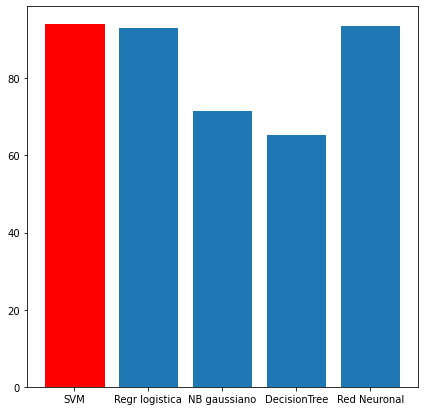

El mejor clasificador ha sidoSVM con {'C': 1, 'gamma': 0.1, 'kernel': 'linear'}
La mejor puntuacion ha sido 93.97 en SVM


In [19]:
fig = plt.figure(figsize = (7,7))
barlist = plt.bar(clf_names,score_list)
barlist[nBest_clf].set_color('r')
plt.show()
print('El mejor clasificador ha sido{} con {}'.format(clf_names[nBest_clf],Best_clf))
print('La mejor puntuacion ha sido {} en {}'.format(round(Best_score,2),clf_names[nBest_clf]))